# Homework : 8 Machine Learning - 1 (Supervised Methods)

## Comparison of PCA and MDA on wine dataset.

### Importing the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from utils.helper import Engine


### Instantiate an object for the Engine Class

In [2]:
engine = Engine()

### Loading the UCI Wine Dataset using Pandas.

In [3]:
import pandas as pd

# Define the column names
columnNames = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
           'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
           'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Load the Wine dataset from the UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wineData = pd.read_csv(url, header=None, names=columnNames)

wineData

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Exploratory Data-Analysis on the UCI Wine Dataset.

In [4]:
engine.performDataAnalysis(wineData)

$$ DATA ANALYSIS OF THE UCI WINE DATAS $$
-------------------------------------------------------------------
Shape of X_train: (178, 13)
Number of Features in the Training Data: 13
Number of Data-Points in the Training Data: 178
Number of classes in Y_train is: 3
{'Barolo wine - 1': 1, 'Grignolino wine - 2': 2, 'Barbera wine - 3': 3}
-------------------------------------------------------------------


### Generating the Train Data from the Pandas Dataframe and Standardizing the X_train.

In [5]:
n_train, X_train, Y_train = engine.generateTrainData(wineData)
X_train_std = engine.standardizeData(X_train)

Generated the Train Data!
Standardized the Train Data!


# 3] (b) PCA based on unnormalized dataset.
# For this part, use the original dataset with no standardization.

## (i) Run PCA, reducing to 2 dimensions, on the entire dataset.

In [6]:
X_train_PCA = engine.transformTrainData_PCA(X_train)


### Plot the data projected into the 2D space, using the same symbols as in part (a) to denote the class label of each data point.

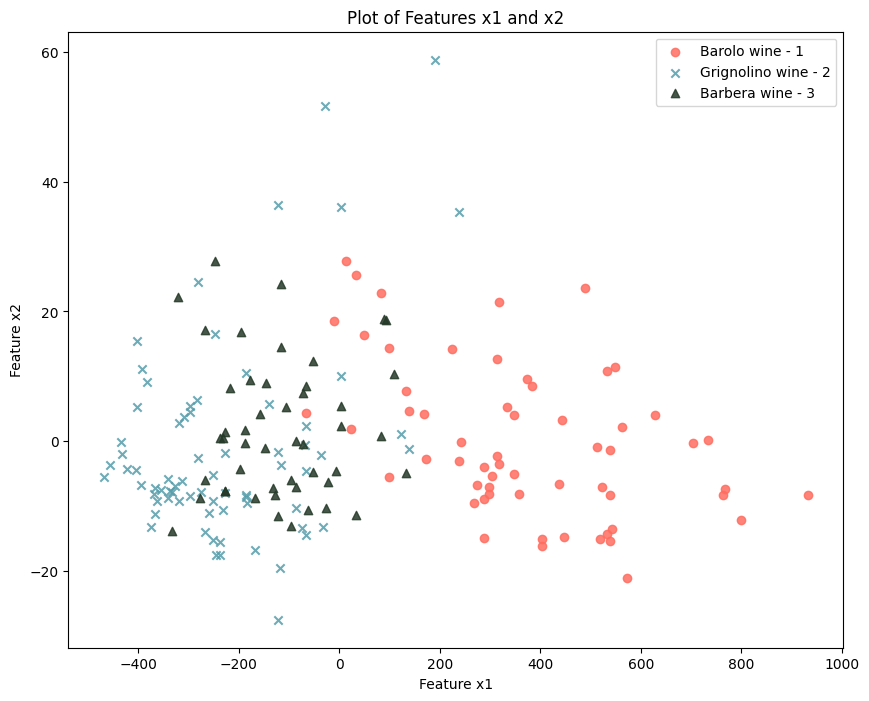

In [7]:
engine.plotScatterData(X_train_PCA[:, 0].reshape(n_train, 1), X_train_PCA[:, 1].reshape(n_train, 1), Y_train, position="upper right")

### Compared with the baseline of (a), do you expect a better classification result with PCA?

## (ii) Repeat (a)(ii) except for the 2 new features resulting from PCA (plot everything in the new (x1, x2) space).

In [8]:
run_min, run_max, model_min_CER, model_max_CER = engine.train_MCP(n_train, X_train_PCA[:, 0], X_train_PCA[:, 1], Y_train, runs=5)

-----------------------------------------------------------------------------------------------------------------------------------
The Mean Classification Error Rate from each cross-val run are: {1: 0.49861111111111117, 2: 0.40763888888888883, 3: 0.38750000000000007, 4: 0.4250000000000001, 5: 0.4715277777777779}
The Average of the Mean Classification Error Rate over the 5 runs is: 0.43805555555555564
The Standard Deviation of the Mean Classification Error Rate over the 5 runs is: 0.041082478768063604
The Lowest Mean Classification Error Rate -> 0.38750000000000007 was achieved at run: 3
The Higesh Mean Classification Error Rate -> 0.49861111111111117 was achieved at run: 1
-----------------------------------------------------------------------------------------------------------------------------------


## Plot the labelled data points of the entire dataset, decision boundaries and regions based on the stored weights resulting from the first fold for the Model with Minimum Classification Error Rate

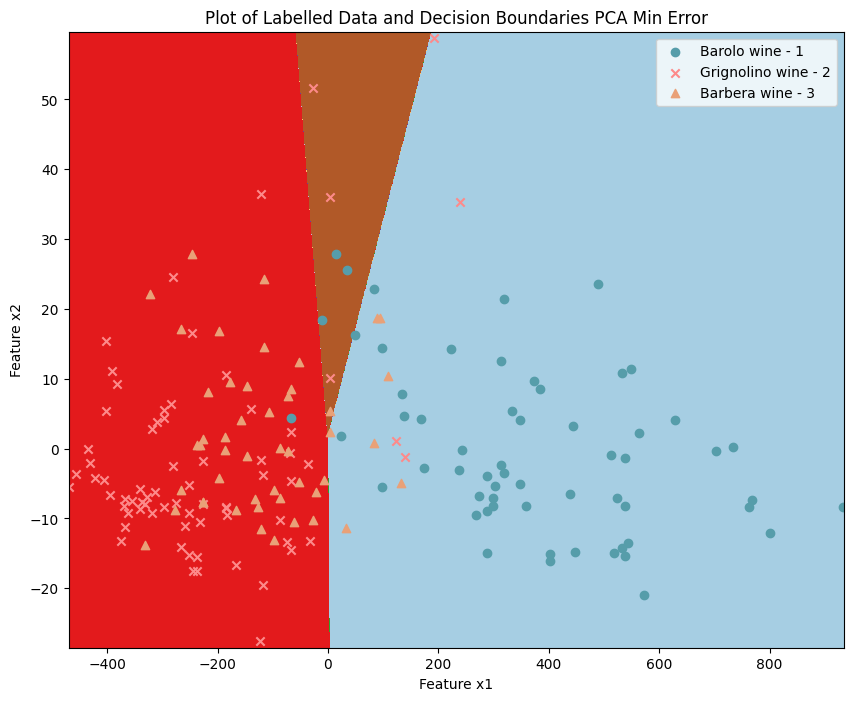

In [9]:
engine.plotDecisionBoundary_MCP(X_train_PCA[:, 0], X_train_PCA[:, 1], Y_train, model_min_CER, "Plot of Labelled Data and Decision Boundaries PCA Min Error", position="upper right", h = 0.2)

## Plot the labelled data points of the entire dataset, decision boundaries and regions based on the stored weights resulting from the first fold for the Model with Maximum Classification Error Rate

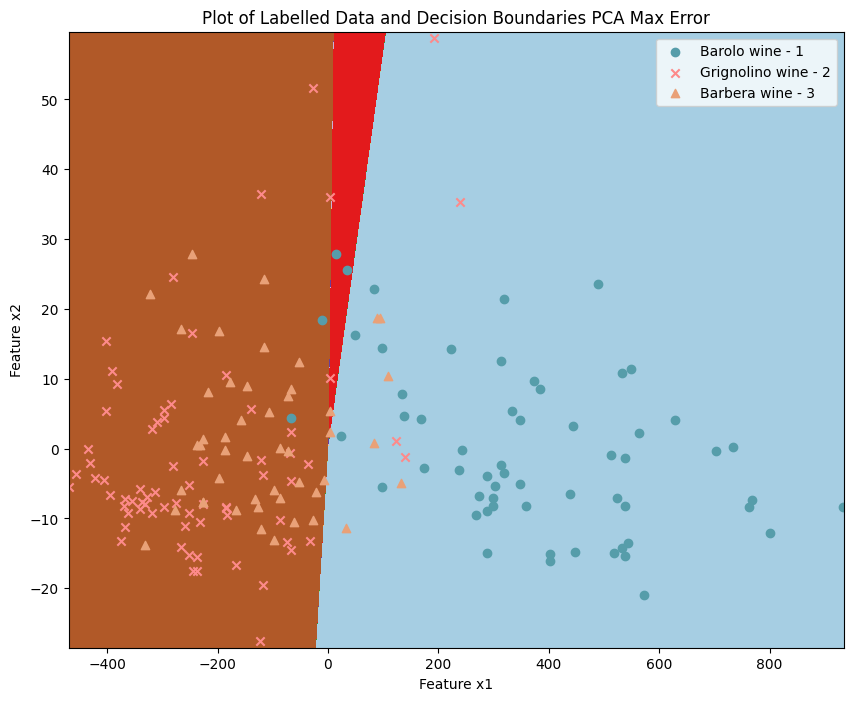

In [10]:
engine.plotDecisionBoundary_MCP(X_train_PCA[:, 0], X_train_PCA[:, 1], Y_train, model_max_CER, "Plot of Labelled Data and Decision Boundaries PCA Max Error", position="upper right", h = 0.2)

## 2] (b) iii] How does it compare with the baselines in (a)(ii)?

## 3] (c) PCA based on standardized dataset.
## Repeat (b)(i)-(ii) except first standardize the data.

In [11]:
X_train_PCA_std = engine.transformTrainData_PCA(X_train_std)

## 3] (C) i]

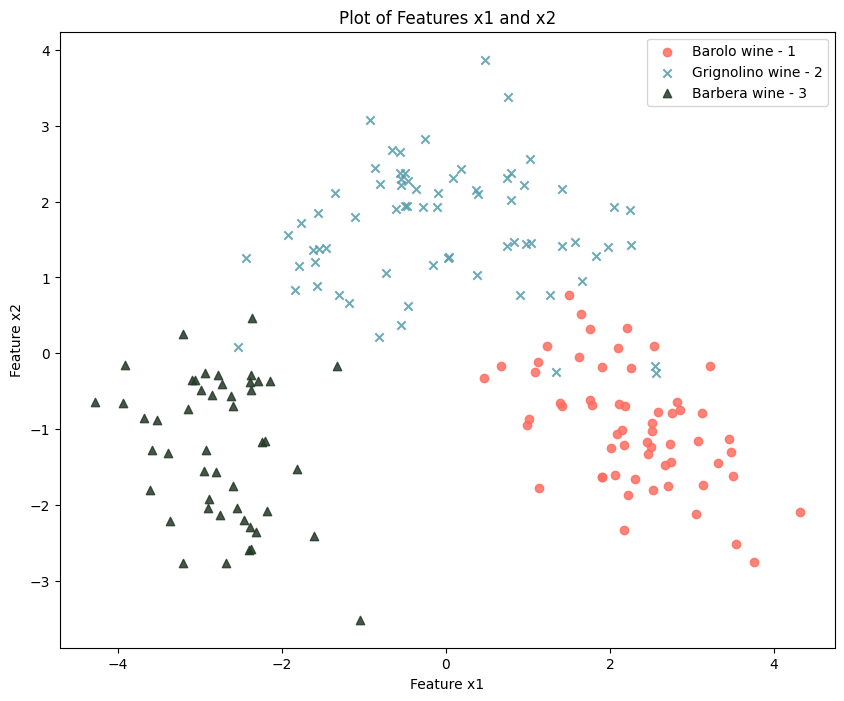

In [12]:
engine.plotScatterData(X_train_PCA_std[:, 0].reshape(n_train, 1), X_train_PCA_std[:, 1].reshape(n_train, 1), Y_train, position="upper right")

## 3] (C) ii]

In [13]:
run_min, run_max, model_min_CER, model_max_CER = engine.train_MCP(n_train, X_train_PCA_std[:, 0], X_train_PCA_std[:, 1], Y_train, runs=5)

-----------------------------------------------------------------------------------------------------------------------------------
The Mean Classification Error Rate from each cross-val run are: {1: 0.055555555555555566, 2: 0.0388888888888889, 3: 0.03402777777777779, 4: 0.05000000000000001, 5: 0.056944444444444464}
The Average of the Mean Classification Error Rate over the 5 runs is: 0.04708333333333335
The Standard Deviation of the Mean Classification Error Rate over the 5 runs is: 0.009111788592698183
The Lowest Mean Classification Error Rate -> 0.03402777777777779 was achieved at run: 3
The Higesh Mean Classification Error Rate -> 0.056944444444444464 was achieved at run: 5
-----------------------------------------------------------------------------------------------------------------------------------


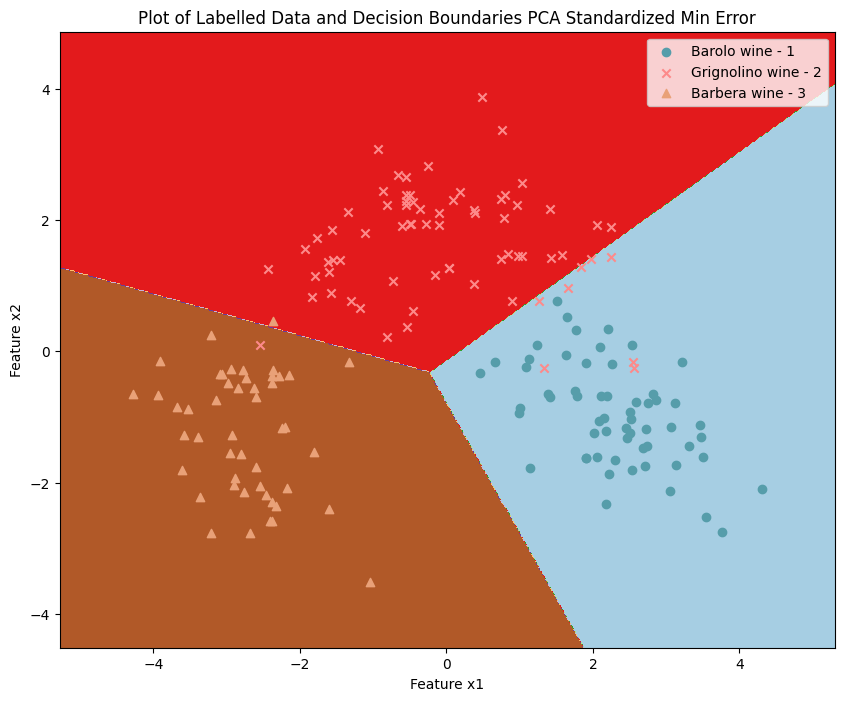

In [14]:
engine.plotDecisionBoundary_MCP(X_train_PCA_std[:, 0], X_train_PCA_std[:, 1], Y_train, model_min_CER, "Plot of Labelled Data and Decision Boundaries PCA Standardized Min Error", position="upper right", h = 0.02)

In [15]:
engine.plotDecisionBoundary_MCP(X_train_PCA[:, 0], X_train_PCA[:, 1], Y_train, model_max_CER, "Plot of Labelled Data and Decision Boundaries PCA Standardized MAx Error", position="upper right", h = 0.02)

## 3] (C) (iii) How does PCA with standardized data compare with PCA using unnormalized data? Why?